In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/combine.csv')
df.head()

,artist_id,artist_name,album_id,album_name,genres,followers,popularity,link_image,url,album_type,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,classic j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,album,...,4,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4
1,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,album,...,4,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4
2,00PLVqZ4oaOmbI4lacLUBO,Stiftelsen,6vYiIkw80Btuehht8d0C8n,Allting låter som Slipknot,classic swedish pop,237999,53,https://i.scdn.co/image/ab6761610000e5eb9fd5de...,https://open.spotify.com/artist/00PLVqZ4oaOmbI...,album,...,0,-6.164,1,0.0476,0.0448,0.000033,0.122,0.330,139.978,4
3,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,album,...,0,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4
4,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,album,...,0,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4


### Data Preprocessing

1. Drop those columns not affect too much to build the model and extract column 'release_date' to year

In [3]:
df.drop('release_date_precision', axis = 1, inplace= True)

In [4]:
# convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# take the year form 'release_date'
df['year'] = df['release_date'].dt.year

In [5]:
df.head()

,artist_id,artist_name,album_id,album_name,genres,followers,popularity,link_image,url,album_type,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,classic j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,album,...,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4,2011
1,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,album,...,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4,2011
2,00PLVqZ4oaOmbI4lacLUBO,Stiftelsen,6vYiIkw80Btuehht8d0C8n,Allting låter som Slipknot,classic swedish pop,237999,53,https://i.scdn.co/image/ab6761610000e5eb9fd5de...,https://open.spotify.com/artist/00PLVqZ4oaOmbI...,album,...,-6.164,1,0.0476,0.0448,0.000033,0.122,0.330,139.978,4,2017
3,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,album,...,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4,2012
4,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,album,...,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4,2012


In [6]:
df.drop('release_date', axis = 1, inplace = True)

In [7]:
df.to_csv("final_combine_csv", index_label= False)

2. Check null values in each columns

In [8]:
df.isnull().sum()

# preview column likes the demo of a full song so, we don't need care too much
# with the genre column has a few null values so we will dropna. It will not affect too much to build model
# when we apply in whole dataset, if having many null values, we will handle later

artist_id             0
artist_name           0
album_id              0
album_name            0
genres               13
followers             0
popularity            0
link_image            0
url                   0
album_type            0
total_tracks          0
track_id              0
name                  0
preview             384
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
year                  0
dtype: int64

In [9]:
tracks = df.drop('preview', axis = 1)
tracks.dropna(inplace= True)
tracks.shape

(1120, 26)

Như chúng ta đã biết, có nhiều phiên bản của cùng một bài hát được phát hành, do đó chúng ta cần loại bỏ các phiên bản khác nhau của cùng một bài hát vì chúng ta đang xây dựng một hệ thống đề xuất dựa trên nội dung mà nhân viên chính là hàm tương đồng cosin, hệ thống của chúng ta sẽ đề xuất các phiên bản của cùng một bài hát nếu có và đó không phải là điều chúng ta mong muốn.

As we knew, there are many versions of the same song released so we need to eliminate different versions of the same song because we are building a content based recommender system where the main agent is cosine similarity function, our system will recommend versions of the same song if there are any and that is not what we want

In [10]:
tracks['name'].nunique(), tracks.shape # nunique convert to number instead of string

(536, (1120, 26))

Vậy thì mối quan tâm của chúng tôi đã đúng, hãy xóa các hàng trùng lặp dựa trên tên bài hát.

So the attention of us is correct, let's delete all duplicates columns based on name of song

In [11]:
# arragne the data based on popularity
tracks = tracks.sort_values(by = 'popularity', ascending= False) 

# drop those duplicated names of song, but still keep the first
tracks.drop_duplicates(subset = ['name'], keep = 'first', inplace = True) 

### Building Recommendation System

##### 1/ Recommend songs by name of song

1. Transform music genres to vectorized matrix

Chúng ta sẽ xử dụng kĩ thuật được gọi là Count Vectorizer để chuyển đổi các thể loại nhạc (genres) thành dạng vector số. Ví dụ như 'rock pop' có thể được mã hóa thành vector [1, 1, 0, ...] trong đó mỗi phần tử biểu thị sự hiện diện hoặc tần suất của 1 từ trong từ 

We will use a technique called Count Vectorizer to convert music genres into a vector of numbers. For example 'rock pop' can be encoded as a vector [1, 1, 0, ...] where each element represents the presence or frequency of a word in the word.

In [12]:
tracks.genres.unique()

array(['pop', 'art pop', 'bhojpuri pop', 'j-pop', 'classic j-pop',
       'classic swedish pop', 'cambodian pop', 'classical piano trio'],
      dtype=object)

- Build CountVectorizer to convert music genres

     art  bhojpuri  cambodian  classic  classical  j-pop  piano  pop  swedish  \
0      0         0          0        0          0      0      0    1        0   
1      0         0          0        0          0      0      0    1        0   
2      0         0          0        0          0      0      0    1        0   
3      1         0          0        0          0      0      0    1        0   
4      1         0          0        0          0      0      0    1        0   
..   ...       ...        ...      ...        ...    ...    ...  ...      ...   
531    0         0          0        0          1      0      1    0        0   
532    0         0          0        0          1      0      1    0        0   
533    0         0          0        0          1      0      1    0        0   
534    0         0          0        0          1      0      1    0        0   
535    0         0          0        0          1      0      1    0        0   

     trio  
0       0  
1  

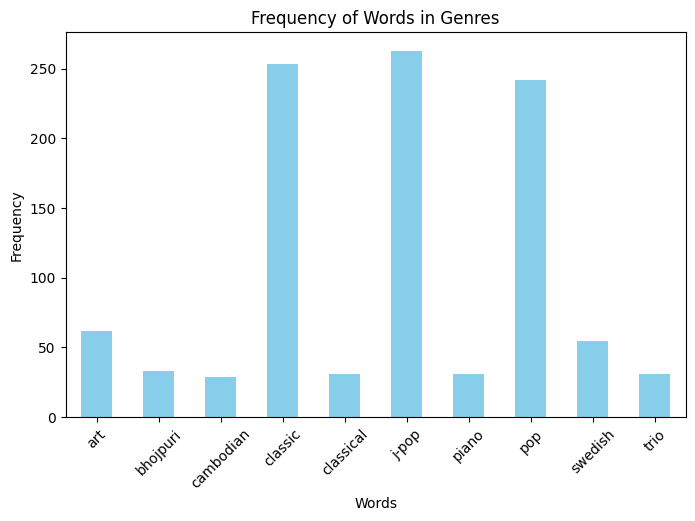

In [13]:
# # step 1: convert all strings to lower case 
# gernes = tracks['genres']
# gernes = [x.lower() for x in gernes]

# # step 2: extract unique words across all genres
# all_words = []

# for g in gernes:
#     all_words.extend(g.split()) # split and extend the list with word
    
# unique_words = np.unique(all_words) # get unique words
    
# # step 3: create a frequency matrix for each document (track's genres)
# frequency_matrix = []

# for g in gernes:
#     word_count = Counter(g.split()) # count word frequency for each track 
#     row = {}
#     for word in unique_words:
#         if word in word_count:
#             row[word] = word_count[word]
#         else:
#             row[word] = 0
#     # row = {word: word_count.get(word, 0) for word in unique_words}
#     frequency_matrix.append(row)

# # convert the frequency matrix into a DataFrame
# frequency_df = pd.DataFrame(frequency_matrix, columns= unique_words).fillna(0)

from collections import Counter

class CountVectorizer:
    def __init__(self):
        self.unique_words = None  # To store the unique words found during fitting

    def fit(self, corpus):
        all_words = []
        for document in corpus:
            all_words.extend(document.lower().split())  # Convert to lowercase and split words
        self.unique_words = np.unique(all_words)  # Extract unique words
        return self

    def transform(self, corpus):
        # if self.unique_words is None:
        #     raise ValueError("CounterVectorizer is not fitted yet. Please call fit() first.")
        
        frequency_matrix = []
        for document in corpus:
            word_count = Counter(document.lower().split())  # Count word frequencies
            row = {}
            for word in self.unique_words:
                if word in word_count:
                    row[word] = word_count[word]
                else:
                    row[word] = 0
            # row = {word: word_count.get(word, 0) for word in self.unique_words}
            frequency_matrix.append(row)
        
        # Convert to DataFrame
        return pd.DataFrame(frequency_matrix, columns=self.unique_words).fillna(0)

    def fit_transform(self, corpus):
        self.fit(corpus)
        return self.transform(corpus)
    
cv = CountVectorizer()

# build vocab
vocab = cv.fit(tracks['genres'])

# transform text to vectorized matrix
vectorized_df = cv.transform(tracks['genres'])
print(vectorized_df)

# # plot barplot of frequency of words in genres
word_counts = vectorized_df.sum(axis=0)
word_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')

plt.title('Frequency of Words in Genres')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# According to the plot, most music genres that are listend are related to pop and classic

2. Find the similiarities between input song with each song in dataset

Content-based filtering cung cấp các đề xuất được thiết kế riêng bằng cách tập trung vào sở thích cá nhân, sắp xếp hiệu quả các tùy chọn với sở thích và mối quan tâm riêng của từng người dùng. Điều này thường đạt được thông qua các kỹ thuật như cosin similarities, đo lường độ tương đồng giữa vectơ người dùng (đại diện cho sở thích của người dùng) và hồ sơ mục. Mô hình không cần bất kỳ dữ liệu nào về người dùng khác vì các đề xuất dành riêng cho người dùng này. Điều này giúp dễ dàng mở rộng quy mô cho nhiều người dùng hơn. Mô hình có thể nắm bắt được sở thích cụ thể của người dùng và có thể đề xuất các mặt hàng ngách mà rất ít người dùng khác quan tâm.

Content-based filtering delivers tailored recommendations by focusing on individual preferences, effectively aligning options with each user's unique tastes and interests. This is often achieved through techniques like cosine similarity, which measures the similarity between the user vector (representing the user's preferences) and the item profile. The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users. The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

- Function to normalize by using Min_Max_Scailing method

In [14]:
def min_max_scaler(df):
    min_max_scaler_df = df.copy() # create a copy DataFrame from main df
    
    columns_to_scale = df.select_dtypes(include = ['number'])
    
    for col in columns_to_scale:
        min_val = df[col].min()
        max_val = df[col].max()
        
        # Min-max scaler implement
        min_max_scaler_df[col] = (df[col] - min_val) / (max_val - min_val)
        
    return min_max_scaler_df

In [15]:
tracks_cleaned_name = tracks.drop(['album_id', 'album_type', 'total_tracks', 'track_id', 'mode', 'time_signature', 'year'], axis= 1)

In [16]:
final_df_name = min_max_scaler(tracks_cleaned_name)
final_df_name.sample(3)

,artist_id,artist_name,album_name,genres,followers,popularity,link_image,url,name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
483,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Norman Fucking Rockwell!,art pop,1.00000,1.000000,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,Love song,0.325953,0.052648,0.818182,0.405527,0.031322,0.976744,0.000177,0.063062,0.273708,0.022792
877,00AFbqxvdDK6T1D6MQZ9c1,GLAY,HEAVY GAUGE,classic j-pop,0.01465,0.538462,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,HEAVY GAUGE,0.378844,0.954932,0.000000,0.812316,0.115019,0.006850,0.001867,0.095334,0.156359,0.358498
919,00AFbqxvdDK6T1D6MQZ9c1,GLAY,THE FRUSTRATED,classic j-pop,0.01465,0.538462,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,Billionaire Champagne Miles Away,0.247232,0.944689,0.181818,0.824379,0.079589,0.019004,0.000000,0.340810,0.541178,0.778829


- Function to calculate Cosine Similarity

In [17]:
def cosine_similarity(A, B):
    
    # Convert 2D vector to 1D vector for calculating
    A = A.flatten()
    B = B.flatten()
    
    # Calculate dot product (tích vô hướng) of A and B
    dot_product = np.dot(A, B)
    
    # Calculate norm (độ dài) of A and B
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    
    # Calculate cosine similarity
    cosine_sim = dot_product / (norm_A * norm_B)
    
    return cosine_sim


- Function to get similarities of each songs based on genres

In [ ]:
frequency_df_genres = cv.fit_transform(final_df_name['genres'])
frequency_df_names = cv.fit_transform(final_df_name['name'])

# def get_similarities(song_name, data, frequency_df_genres, frequency_df_names):

#     # Ensure indices of frequency_df align with tracks DataFrame
#     frequency_df_genres = frequency_df_genres.set_index(data.index)
#     frequency_df_names = frequency_df_names.set_index(data.index)

#     # Get genre vector and numeric vector for the input song
#     if song_name not in data['name'].values:
#         # Maybe users can not remember the full name of a song. So we need to check the word in 'frequency_df_names'
#         # 1. If the imcompleted word is not in 'frequency_df_names', we will return ValueError
#         # 2. If the imcompleted word is in 'frequency_df_names', we will calculate cosine similarities of those
        
#         if data['name'].str.contains(song_name, case = False, na = False):
#             name_array1 = frequency_df_names.loc[data['name'].str.contains(song_name, case = False, na = False)].iloc[0].to_numpy()
#             num_array1 = data.loc[data['name'].str.contains(song_name, case = False, na = False), data.select_dtypes(include=np.number).columns].to_numpy()
        
#             # Store similarity scores for each song
#             sim = []
#             for ind, row in data.iterrows():
#                 name = row['name'].str.contains(song_name, case = False, na = False).iloc[ind]
                
#                 # Get name vector and numeric vector for the current song 
#                 name_array2 = frequency_df_names.loc[data['name'].str.contains(name, case = False, na = False)].to_numpy()
#                 num_array2 = data.loc[data['name'].str.contains(name, case = False, na = False), data.select_dtypes(include=np.number).columns].to_numpy()
                
#                 # Calculate simliarities
#                 name_sim = cosine_similarity(name_array1, name_array2)
#                 num_sim = cosine_similarity(num_array1, num_array2)
#                 sim.append(name_sim + num_sim)     
            
#             return sim 
              
#         else:
#             text_array1 = frequency_df_genres.loc[data['name'] == song_name].to_numpy()
#             num_array1 = data.loc[data['name'] == song_name, data.select_dtypes(include=np.number).columns].to_numpy()

#             # Store similarity scores for each song
#             sim = []
#             for idx, row in data.iterrows():
#                 name = row['name']

#                 # Get genre vector and numeric vector for the current song
#                 text_array2 = frequency_df_genres.loc[data['name'] == name].to_numpy()
#                 num_array2 = data.loc[data['name'] == name, data.select_dtypes(include=np.number).columns].to_numpy()

#                 # Calculate similarities
#                 text_sim = cosine_similarity(text_array1, text_array2)
#                 num_sim = cosine_similarity(num_array1, num_array2)
#                 sim.append(text_sim + num_sim)

#             return sim

def get_similarities(song_name, data, frequency_df_genres, frequency_df_names):

    # Ensure indices of frequency_df align with tracks DataFrame
    frequency_df_genres = frequency_df_genres.set_index(data.index)
    frequency_df_names = frequency_df_names.set_index(data.index)

    # Check if the song_name exists in the data
    if song_name not in data['name'].values:
        """ Maybe users can not remember the full name of a song. So we need to check the word in 'frequency_df_names'
            1. If the imcompleted word is not in 'frequency_df_names', we will return ValueError
            2. If the imcompleted word is in 'frequency_df_names', we will calculate cosine similarities of those """
        # Get name vector and numeric vector for the current song
        if data['name'].str.contains(song_name, case=False, na=False).any():
            partial_match_idx = data['name'].str.contains(song_name, case=False, na=False)
            name_array1 = frequency_df_names.loc[partial_match_idx].iloc[0].to_numpy()
            num_array1 = data.loc[partial_match_idx, data.select_dtypes(include=np.number).columns].iloc[0].to_numpy()
        
            # Store similarity scores for each song
            sim = []
            for _, row in data.iterrows():
                name = row['name']
                name_array2 = frequency_df_names.loc[data['name'] == name].iloc[0].to_numpy()
                num_array2 = data.loc[data['name'] == name, data.select_dtypes(include=np.number).columns].iloc[0].to_numpy()
                
                # Calculate similarities
                name_sim = cosine_similarity(name_array1, name_array2)
                num_sim = cosine_similarity(num_array1, num_array2)
                sim.append(name_sim + num_sim)     
            
            return sim 
              
        else:
            raise ValueError(f"No matches found for the song name '{song_name}' in the dataset.")
    else:
        # Get genre vector and numeric vector for the current song
        text_array1 = frequency_df_genres.loc[data['name'] == song_name].iloc[0].to_numpy()
        num_array1 = data.loc[data['name'] == song_name, data.select_dtypes(include=np.number).columns].iloc[0].to_numpy()

        # Store similarity scores for each song
        sim = []
        for _, row in data.iterrows():
            name = row['name']

            # Get genre vector and numeric vector for the current song
            text_array2 = frequency_df_genres.loc[data['name'] == name].iloc[0].to_numpy()
            num_array2 = data.loc[data['name'] == name, data.select_dtypes(include=np.number).columns].iloc[0].to_numpy()

            # Calculate similarities
            text_sim = cosine_similarity(text_array1, text_array2)
            num_sim = cosine_similarity(num_array1, num_array2)
            sim.append(text_sim + num_sim)

        return sim



3. Build recommendation songs by name of song

In [96]:
# Set display option to show full column values
pd.set_option('display.max_colwidth', None)

def recommend_songs_by_name(song_name, frequency_df_genres, frequency_df_names, data):
    # Base case: Handle invalid or unpopular songs
    if data[data['name'].str.contains(song_name, case=False, na=False)].shape[0] == 0:
        print(f"This song is either not so popular or you entered an invalid name: '{song_name}'.")
        print("\nSome songs you may like:\n")
        
        for song in data.sample(n=5)['name'].values:
            print(song)
        return

    # Calculate similarity factors for all songs
    data['similarity_factor'] = get_similarities(song_name, data, frequency_df_genres, frequency_df_names)

    # Sort by similarity factor and popularity
    data_sorted = data.sort_values(by=['similarity_factor', 'popularity'],
                                    ascending=[False, False]).copy()

    # Display top 5 songs (excluding the input song itself if needed)
    print(f"Recommended songs for '{song_name}':")
    display(data_sorted[['artist_name', 'name', 'genres', 'similarity_factor', 'url']].head(5))

In [98]:
recommend_songs_by_name("Dealer", frequency_df_genres,frequency_df_names, final_df_name)

Recommended songs for 'Dealer':


,artist_name,name,genres,similarity_factor,url
500,Lana Del Rey,Dealer,art pop,2.000000,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
529,Lana Del Rey,Dark Paradise,art pop,1.990080,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
907,Lana Del Rey,Blue Jeans - Remastered 2011,art pop,1.979942,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
905,Lana Del Rey,This Is What Makes Us Girls,art pop,1.974676,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
839,Lana Del Rey,Lust For Life (with The Weeknd),art pop,1.967301,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa


##### 2/ Recommend songs through mood and genres 

1. Using Standard Scaling to scale

- Function to normalize by using Standard Scaling method

In [13]:
tracks_cleaned_mood = tracks.drop(['album_id', 'album_type', 'total_tracks', 'track_id', 'mode', 'time_signature', 'year'], axis= 1)

In [14]:
def Z_score(df):
    z_score_df = df.copy() # create a copy DataFrame from main df
    
    columns_to_scale = df.select_dtypes(include= ['number'])
    
    for col in columns_to_scale:
        mean_val = df[col].mean()
        std_val = df[col].std()
        
        # Standard deviation implement
        z_score_df[col] = (df[col] - mean_val) / std_val
        
    return z_score_df

z_score_df = Z_score(tracks_cleaned_mood)
z_score_df.head(3)

,artist_id,artist_name,album_name,genres,followers,popularity,link_image,url,name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
544,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Ultraviolence (Deluxe),pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,West Coast,0.433278,-0.293280,0.247993,-0.094672,-0.416675,-0.345368,-0.194241,-0.713345,0.201794,-0.135065
281,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Lust For Life,pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,13 Beaches,-0.928816,-1.004475,0.519267,-0.402889,-0.474625,0.617263,0.156994,-0.250440,-0.676207,0.525226
296,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Honeymoon,pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,Art Deco,-1.286892,-0.740418,1.604363,-0.818604,-0.168578,0.631214,0.994367,-0.583373,-1.468488,0.655200


2. Using K-means algorithm to catgorize moods based on those important features

    valence    energy  danceability  acousticness     tempo
0  0.713615  0.500279      0.818561     -0.442254 -0.183262
1  0.062205  0.676554     -0.649127     -0.720772  0.906217
2 -0.973785 -1.255337     -0.465131      1.220739 -0.584288


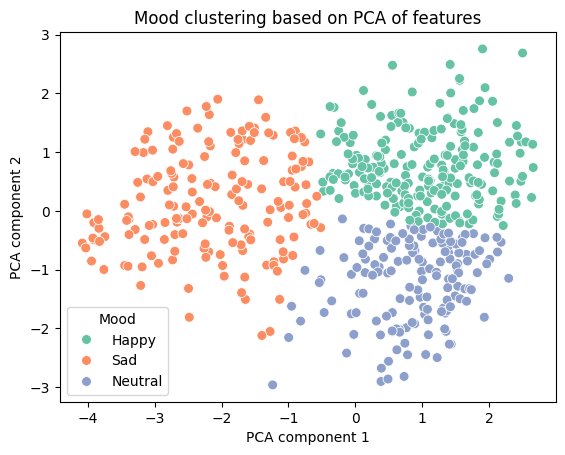

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# choose related features 
features_scaled = z_score_df[['valence', 'energy', 'danceability', 'acousticness', 'tempo']]

# apply kmeans with 3 clusters (Happy, Sad, Neutral)
kmeans = KMeans(n_clusters= 3, random_state= 42)

# calculate the mean value of the features for each cluster 
kmeans.fit(features_scaled)
cluster_centers = kmeans.cluster_centers_
cluster_features = pd.DataFrame(cluster_centers, columns= features_scaled.columns)
print(cluster_features)

""" You can see the cluster features df:
1. with high valence, energy, and danceability -> maybe "Happy"
2. with low valence, energy, danceability but high acouticness -> maybe "Sad"
3. Remaining features -> will be "Neutral" """

z_score_df['mood_score'] = kmeans.fit_predict(features_scaled)

# name for each cluster
mood_labels = {0: "Happy", 1: "Neutral", 2: "Sad"}
z_score_df['mood'] = z_score_df['mood_score'].map(mood_labels)

# perform PCA to reduce dimension to 2 components 
pca = PCA(n_components= 2)
features_pca = pca.fit_transform(features_scaled)

# add PCA components to the DataFrame
z_score_df['PCA1'] = features_pca[:, 0]
z_score_df['PCA2'] = features_pca[:, 1]

# scatter plot for PCA components with mood labels
sns.scatterplot(data = z_score_df, x = 'PCA1', y = 'PCA2', hue = 'mood', palette= 'Set2', s = 50)
plt.title("Mood clustering based on PCA of features")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend(title = 'Mood')
plt.show()

In [16]:
tmp_df = tracks[['artist_id', 'followers', 'popularity']]
tmp_df.head(3)

,artist_id,followers,popularity
544,00FQb4jTyendYWaN8pK0wa,40266213,92
281,00FQb4jTyendYWaN8pK0wa,40266213,92
296,00FQb4jTyendYWaN8pK0wa,40266213,92


In [17]:
final_df_mood = z_score_df.copy()

# Return followers and popularity to original values
followers_mean = tmp_df['followers'].mean()
followers_std = tmp_df['followers'].std()

popularity_mean = tmp_df['popularity'].mean()
popularity_std = tmp_df['popularity'].std()

final_df_mood['followers'] = (final_df_mood['followers'] * followers_std) + followers_mean
final_df_mood['popularity'] = (final_df_mood['popularity'] * popularity_std) + popularity_mean
    
final_df_mood.head(3)

,artist_id,artist_name,album_name,genres,followers,popularity,link_image,url,name,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mood_score,mood,PCA1,PCA2
544,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Ultraviolence (Deluxe),pop,40266213.0,92.0,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,West Coast,0.433278,...,-0.416675,-0.345368,-0.194241,-0.713345,0.201794,-0.135065,0,Happy,0.195889,0.418500
281,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Lust For Life,pop,40266213.0,92.0,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,13 Beaches,-0.928816,...,-0.474625,0.617263,0.156994,-0.250440,-0.676207,0.525226,2,Sad,-1.325859,-0.924119
296,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Honeymoon,pop,40266213.0,92.0,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,Art Deco,-1.286892,...,-0.168578,0.631214,0.994367,-0.583373,-1.468488,0.655200,2,Sad,-1.643108,-1.509144


3. Build recommendation songs by mood and genres

In [37]:
# pd.set_option('display.max_colwidth', None)

# def recommend_music_by_mood(df, mood, num_recommendations= 5):
    
#     # Filter the DataFrame by the specified mood
#     mood_tracks = df[df['mood'] == mood]
    
#     # If fewer tracks are available than requested, return all
#     if len(mood_tracks) <= num_recommendations:
#         return mood_tracks
    
#     # Randomly sample tracks for variety
#     recommended_tracks = mood_tracks.sample(n=num_recommendations, random_state=30)
    
#     data_sorted = recommended_tracks.sort_values(by = ['popularity', 'followers'], ascending = [False, False]).copy()
#     print("Recommend songs by mood:")
#     display(data_sorted[['artist_name', 'name', 'genres', 'mood', 'popularity', 'tempo']])

# Set display option to show full column values
pd.set_option('display.max_colwidth', None)

def recommend_music_by_mood_genre(df, mood, genre, num_recommendation = 5):
    
    # Filter dataFrame by mood and genre
    filtered_tracks = df[(df['mood'] == mood) & (df['genres'].str.contains(genre, case = False))]
    
    
    if filtered_tracks.empty:
        print(f"No tracks found with mood {mood} and genre {genre}. Here are some other suggestions:")
        # If no tracks match both mood and genre, recommend random songs from the same mood. 
        # But if no tracks match with mood, recommend random songs from the same genre
        mood_tracks = df[df['mood'] == mood]
        genres_tracks = df[df['genres'].str.contains(genre, case = False, na = False)]
        if mood_tracks.empty:
            print(f"No tracks found with selected mood. Show random suggestions by genre {genre}:")
            genre_recommendations = genres_tracks.sample(n = min(num_recommendation, len(df)), random_state = 30)
            random_genre_sorted = genre_recommendations.sort_values(by = ['popularity', 'followers'], ascending = [False, False]).copy()
            display(random_genre_sorted[['artist_name', 'name', 'genres', 'mood', 'popularity']])
        else:
            print(f"No tracks found with selected genre. Show random suggestions by mood {mood}:")
            mood_recommendations = mood_tracks.sample(n = min(num_recommendation, len(df)), random_state = 42)
            random_mood_sorted = mood_recommendations.sort_values(by = ['popularity', 'followers'], ascending = [False, False]).copy()
            display(random_mood_sorted[['artist_name', 'name', 'genres', 'mood', 'popularity']])
        return 
    
    # If fewer tracks are available than requested, return all
    if len(filtered_tracks) <= num_recommendation:
        recommendations = filtered_tracks
    else:
        # randomly sample tracks for variety
        recommendations = filtered_tracks.sample(n = num_recommendation, random_state =42)
        
    # Sort the recommendations by popularity and followers
    data_sorted = recommendations.sort_values(by = ['popularity', 'followers'], 
                                              ascending = [False, False]).copy()
    
    print(f"Recommended songs with mood {mood} and genre {genre}:")
    display(data_sorted[['artist_name', 'name', 'genres', 'mood', 'popularity']])
    

In [38]:
recommend_music_by_mood_genre(final_df_mood, 'Happy', 'trio', 5)

No tracks found with mood Happy and genre trio. Here are some other suggestions:
No tracks found with selected genre. Show random suggestions by mood Happy:


,artist_name,name,genres,mood,popularity
96,Lana Del Rey,Doin' Time,pop,Happy,92.0
493,GLAY,HIGHWAY No.5,classic j-pop,Happy,56.0
495,Stiftelsen,Rotlös,classic swedish pop,Happy,53.0
416,ឆន សុវណ្ណរាជ,ធម្មជាតិស្ងៀមឈឹង,cambodian pop,Happy,22.0
191,ឆន សុវណ្ណរាជ,បុគ្គលក្បត់,cambodian pop,Happy,22.0


In [39]:
recommend_music_by_mood_genre(final_df_mood, 'Sad', 'classic', 5)

Recommended songs with mood Sad and genre classic:


,artist_name,name,genres,mood,popularity
796,GLAY,Julia (THE GREAT VACATION in NISSAN STADIUM Live ver.),classic j-pop,Sad,56.0
1097,GLAY,Hospital pm9,classic j-pop,Sad,56.0
334,GLAY,HAPPINESS,classic j-pop,Sad,56.0
737,Gould Piano Trio,"Trio in E Minor, Op. 90, 'Dumky': III. Andante",classical piano trio,Sad,14.0
136,Gould Piano Trio,"Trio in F Minor, Op. 65: I. Allegro ma non troppo",classical piano trio,Sad,14.0


In [40]:
recommend_music_by_mood_genre(final_df_mood, 'Vui Ve', 'pop', 5)

No tracks found with mood Vui Ve and genre pop. Here are some other suggestions:
No tracks found with selected mood. Show random suggestions by genre pop:


,artist_name,name,genres,mood,popularity
519,Lana Del Rey,Jon Batiste Interlude,art pop,Sad,92.0
1113,Lana Del Rey,Summer Bummer (feat. A$AP Rocky & Playboi Carti),pop,Happy,92.0
905,Lana Del Rey,This Is What Makes Us Girls,art pop,Happy,92.0
855,GLAY,17ans,classic j-pop,Happy,56.0
578,GLAY,いつか,j-pop,Neutral,56.0
